In [1]:
import random

#Project has two deck version
#Version 1: Infinite deck: On every run a card is drawn with equal probability.
#Version 2: Single deck: One deck of cards is used. The deck is reshuffled after every game.

#returns new deck of Version 2
def newDeck():
    return {'Ace': 4, 'Two': 4, 'Three': 4, 'Four': 4, 'Five': 4, 'Six':4, 'Seven':4, 'Eight':4,
         'Nine': 4, 'Ten': 4, 'J': 4, 'Q':4, 'K': 4}

deck = newDeck()

#Check if Deck is Empty
def isEmpty():
    for key, value in deck.items():
        if value > 0:
            return False
    return True


#draw cards from deck
def drawCardVersion2():
    card, numcards = random.choice(list(deck.items()))
    if numcards > 0:
        deck[card] -= 1
        return card
    elif not isEmpty():
        return drawCardVersion2()
    else:
        return 'Empty Deck'

In [1]:
from main import *

In [2]:
import seaborn as sns
from scipy.stats import norm

In [15]:
policy_1_stats = get_all_stats(policy_1, 10000, 100)

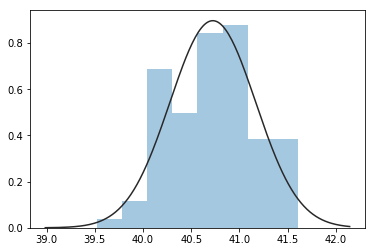

In [16]:
#policy 1 stats and plots
win_percent = []
for i in policy_1_stats['totals']['P_Wins_total']:
    win_percent.append(i/len(policy_1_stats['totals']['P_Wins_total']))
ax = sns.distplot(win_percent, fit=norm, kde=False)

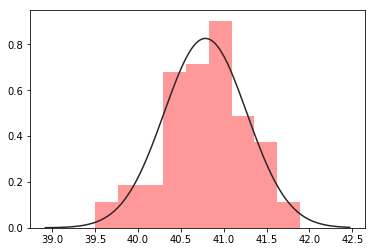

In [17]:
lose_percent = []
for i in policy_1_stats['totals']['D_Wins_total']:
    lose_percent.append(i/len(policy_1_stats['totals']['P_Wins_total']))
ax = sns.distplot(lose_percent, color="r", fit=norm, kde=False)

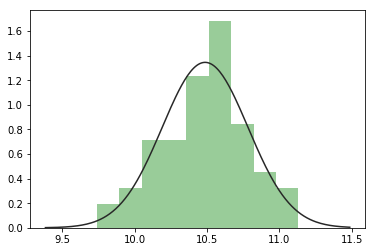

In [18]:
draw_percent = []
for i in policy_1_stats['totals']['Draw_total']:
    draw_percent.append(i/len(policy_1_stats['totals']['P_Wins_total']))
ax = sns.distplot(draw_percent, color="g", fit=norm, kde=False)

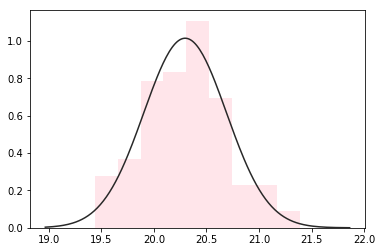

In [23]:
player_bust_percent = []
for i in policy_1_stats['totals']['P_Bust_total']:
    player_bust_percent.append(i/len(policy_1_stats['totals']['P_Bust_total']))
ax = sns.distplot(player_bust_percent, color="pink", fit=norm, kde=False)

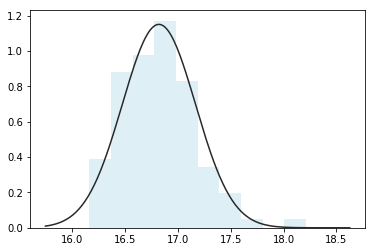

In [26]:
dealer_bust_percent = []
for i in policy_1_stats['totals']['D_Bust_total']:
    dealer_bust_percent.append(i/len(policy_1_stats['totals']['D_Bust_total']))
ax = sns.distplot(dealer_bust_percent, color="lightblue", fit=norm, kde=False)

In [29]:
for (key, value) in policy_1_stats.items():
    if key != 'totals':
        print(key, value)

P_Wins (4072.4, 44.69, 40.72)
D_Wins (4078.78, 48.51, 40.79)
P_Bust (2029.77, 39.54, 20.3)
D_Bust (1681.85, 44.69, 16.82)
Draw (1048.68, 29.81, 10.49)
